

## 卷积神经网络（CNN）入门

1. 为什么学习卷积神经网络？

计算机视觉（Computer Vision）是近年来深度学习推动下发展最快的领域之一。
它的应用随处可见：

* **自动驾驶**：识别周围的车辆和行人，从而避免碰撞。
* **人脸识别**：如今解锁手机甚至开门，都可以仅靠“刷脸”完成。
* **推荐与筛选**：手机上的美食、酒店、风景照片展示，背后都有深度学习帮你筛选“最吸引人”的图片。
* **艺术创作**：神经网络还能创造新的艺术风格图像。

学习计算机视觉的两个主要理由：

1. **开启全新应用**：许多几年前还不可能的应用，如今已成为现实。掌握这些工具，你也能创造新的产品。
2. **启发跨领域创新**：即使不直接从事计算机视觉，CV 领域的创新网络结构和算法也能给语音识别、自然语言处理等其他方向带来灵感。

---

2. 计算机视觉中的典型任务

2.1 **图像分类（Image Classification）**
   输入一张图片（如 64×64），判断它是猫还是狗。

2.2 **目标检测（Object Detection）**
   不仅识别图像中有什么对象，还要定位它们。例如自动驾驶中，不只是知道有“车”，还要知道“车在哪里”，并用边框框出多个目标。

2.3 **风格迁移（Neural Style Transfer）**
   把一幅图像的“内容”与另一幅图像的“风格”结合。例如用毕加索的画风重新绘制一张照片。

这些任务展示了 CNN 不仅能识别，还能创造和重构。

---

3. 为什么要用卷积？

3.1 图像数据规模问题

* 小图像（64×64，RGB 三通道）：输入特征数 = 64×64×3 = 12,288。
* 大图像（1000×1000，RGB）：输入特征数 = 1000×1000×3 = 3,000,000。

如果直接用全连接网络：

* 假设第一层有 1000 个隐藏单元
* 权重矩阵大小 = 1000 × 3,000,000 = 30 亿参数！

问题：

* 数据量不足，极易过拟合
* 计算和存储需求极高，不可行

3.2 卷积操作的优势

卷积运算（Convolution）是 CNN 的核心构件。它通过 **局部连接** 和 **参数共享** 大幅减少参数数量，使得大图像也能高效处理。

---

4. 小结

* 卷积神经网络解决了传统全连接网络在图像任务上的参数爆炸问题。
* 它能支撑图像分类、目标检测、风格迁移等多种任务。
* 学习 CNN 不仅能帮助你进入计算机视觉领域，还能启发其他 AI 研究方向。


## 卷积操作

CNN最重要的是构建块是卷积层：直接连接图片输入的卷积层不会连接到图像中的每个像素，而只是只与某个框定范围内的像素相连接；同样，第二卷积层的每个神经元也仅连接第一层中某个框定范围内的神经元；这种允许神经网络关注第一个隐藏层的低阶特征，然后在下一个隐藏层中将它们组装成高阶特征，以此类推。

CNN在图像识别方便效果好的原因之一是现实中的图像也有层次结构。

![矩形范围内连接的CNN层](./images/CNN/p1.png)

注意：之前研究的所有多层神经网络都具有由一长串神经元组成的层，必须将输入图像展平为一维，然后再将其输入神经网络。在CNN中，每一层都以二维形式表示，这使得将神经元与其相应的输入进行匹配变得更加容易。

![图片的层次结构1](./images/CNN/p2.png)

### 边缘检测

![卷积操作例子](./images/CNN/p3.png)

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d, correlate2d
import tensorflow as tf

K_vertical = np.array([[ 1,  0, -1],
                       [ 1,  0, -1],
                       [ 1,  0, -1]], dtype=np.float32)

some_data = np.array([[3,0,1,2,7,4],
                      [1,5,8,9,3,1],
                      [2,7,2,5,1,3],
                      [0,1,3,1,7,8],
                      [4,2,1,6,2,8],
                      [2,4,5,2,3,9]])

print(convolve2d(some_data, K_vertical, mode="valid"))   # 严格数学的卷积
print(correlate2d(some_data, K_vertical, mode="valid"))  # 深度学习的卷积其实是 交叉相关（correlate2d）

# 深度学习框架的卷积
some_data_tensor =tf.constant(some_data.reshape(1,6,6,1), dtype=tf.float32)
K_vertical_tensor = tf.constant(K_vertical.reshape(3,3,1,1), dtype=tf.float32)

y = tf.nn.conv2d(some_data_tensor, K_vertical_tensor, strides=1, padding='VALID')
y.numpy().squeeze()

[[ 5.  4.  0. -8.]
 [10.  2. -2. -3.]
 [ 0.  2.  4.  7.]
 [ 3.  2.  3. 16.]]
[[ -5.  -4.   0.   8.]
 [-10.  -2.   2.   3.]
 [  0.  -2.  -4.  -7.]
 [ -3.  -2.  -3. -16.]]


array([[ -5.,  -4.,   0.,   8.],
       [-10.,  -2.,   2.,   3.],
       [  0.,  -2.,  -4.,  -7.],
       [ -3.,  -2.,  -3., -16.]], dtype=float32)

In [39]:
from sklearn.datasets import load_sample_images
image = load_sample_images()["images"][-1]

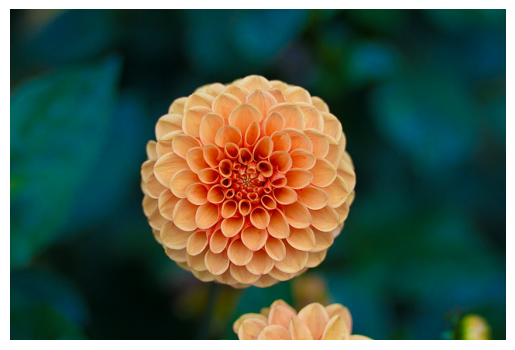

In [40]:
plt.imshow(image)
plt.axis("off")
plt.show()

In [42]:
gray_image =  (0.299*image[...,0] + 0.587*image[...,1] + 0.114*image[...,2]).astype(np.float32)  # 彩色图片并转为灰度

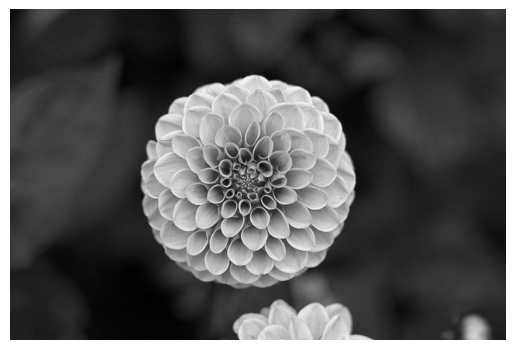

In [43]:
plt.imshow(gray_image,cmap="gray")
plt.axis("off")
plt.show()

In [44]:
# 构建一个3*3的卷积窗口（滤波器）

K_vertical = np.array([[ 1,  0, -1],
                       [ 1,  0, -1],
                       [ 1,  0, -1]], dtype=np.float32)

K_horizontal = np.array([[ 1,  1,  1],
                         [ 0,  0,  0],
                         [-1, -1, -1]], dtype=np.float32)


# 构建 7*7的卷积窗口
d = np.array([-3, -2, -1, 0, 1, 2, 3], dtype=np.float32)
s = np.array([ 1,  6, 15,20,15, 6, 1], dtype=np.float32)
K_vertical_fancy  = np.outer(s, d)   # 7x7 水平核
K_horizontal_fancy = K_vertical_fancy.T             # 7x7 垂直核

edge_v = convolve2d(gray_image, K_vertical_fancy, mode='valid')
edge_h = convolve2d(gray_image, K_horizontal_fancy, mode='valid')

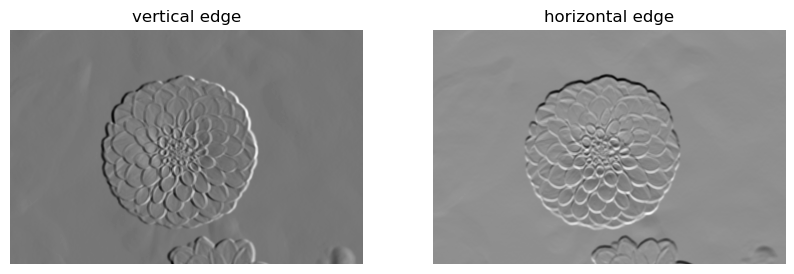

In [45]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(edge_v, cmap="gray")
plt.axis("off")
plt.title("vertical edge")

plt.subplot(122)
plt.imshow(edge_h, cmap="gray")
plt.axis("off")
plt.title("horizontal edge")

plt.show()